In [ ]:
# Does basic processing of APAPANE data
# (see Google Sheet 'Testbench data, 2023 04 20-23')

# Created 2023 Apr 24 by E.S.

In [249]:
from astropy.io import fits
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

In [20]:
stem = '/Users/bandari/Documents/git.repos/photonics_spectroscopy/notebooks_for_development/'

In [21]:
file_list = glob.glob('*.fits')

In [22]:
def make_mean(file_name_abs):
    '''
    Make mean of cube
    '''
    
    hdul = fits.open(file_name_abs)
    mean_array = np.mean(hdul[0].data,axis=0)
    
    return mean_array

In [23]:
# make darks

dark_1 = make_mean(stem + 'data_apapane/20230420/apapane_05:58:11.947031663_trunc.fits')
dark_2 = make_mean(stem + 'data_apapane/20230420/apapane_07:33:03.306408896_trunc.fits')
dark_3 = make_mean(stem + 'data_apapane/20230423/apapane_06:19:36.463049981_trunc.fits')

In [42]:
# read in 

frame_1720_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:02:01.856791344_trunc.fits')
frame_1680_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:06:51.334841731_trunc.fits')
frame_1640_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:08:15.543881629_trunc.fits')
frame_1600_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:09:04.479955163_trunc.fits')
frame_1560_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:09:53.053649105_trunc.fits')
frame_1520_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:12:19.400481008_trunc.fits')
frame_1480_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:12:54.805646655_trunc.fits')
frame_1440_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:14:20.678878878_trunc.fits')
frame_1400_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:14:55.791459728_trunc.fits')
frame_1360_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:16:42.750078070_trunc.fits')
frame_1320_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:18:38.002753960_trunc.fits')
frame_1280_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:22:04.074218445_trunc.fits')
frame_1240_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:23:45.285509172_trunc.fits')
frame_1200_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:24:20.993875452_trunc.fits')
frame_1160_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:26:56.859106871_trunc.fits')
frame_1120_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:27:45.559905657_trunc.fits')
frame_1080_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:28:21.370483695_trunc.fits')
frame_1040_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:28:56.840062209_trunc.fits')
frame_1010_raw = make_mean(stem + 'data_apapane/20230420/apapane_07:29:41.081546758_trunc.fits')

frame_superk_raw = make_mean(stem + 'data_apapane/20230423/apapane_06:40:50.511630014_trunc.fits')

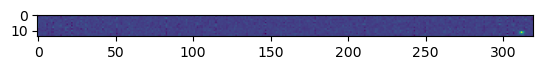

In [196]:
plt.imshow((frame_1720_raw-dark_1)[128-7:128+7,:])
plt.show()

In [197]:
np.shape((frame_1720_raw-dark_1)[128-7:128+7,:])

(14, 320)

In [198]:
dict_1 = {'1720': frame_1720_raw-dark_1, 
          '1680': frame_1680_raw-dark_1,
          '1640': frame_1640_raw-dark_1, 
          '1600': frame_1600_raw-dark_1, 
          '1560': frame_1560_raw-dark_1, 
          '1520': frame_1520_raw-dark_1, 
          '1480': frame_1480_raw-dark_1, 
          '1440': frame_1440_raw-dark_1, 
          '1400': frame_1400_raw-dark_1, 
          '1360': frame_1360_raw-dark_1, 
          '1320': frame_1320_raw-dark_1, 
          '1280': frame_1280_raw-dark_1, 
          '1240': frame_1240_raw-dark_1, 
          '1200': frame_1200_raw-dark_1, 
          '1160': frame_1160_raw-dark_1, 
          '1120': frame_1120_raw-dark_1, 
          '1080': frame_1080_raw-dark_1, 
          '1040': frame_1040_raw-dark_1, 
          '1010': frame_1010_raw-dark_1
         }

<Figure size 640x480 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

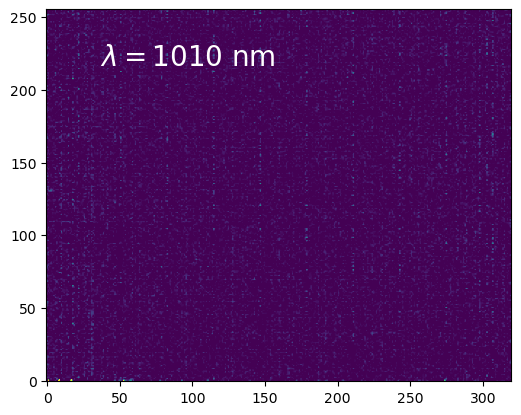

In [92]:
# write animation of basis set

for key in dict_1:

    plt.clf()
    fig, ax = plt.subplots(figsize=(6,6))

    ax.imshow(dict_1[key],norm='linear',vmin=0,vmax=150,origin="lower")

    ax.annotate('$\lambda=$'+key+' nm', fontsize=20,
                xy=(100, 350), xycoords='figure pixels', color='white')

    plt.savefig('basis_set_'+key+'.png')

In [213]:
# put everything into 'registered' cube, with appropriate cropping

response_cube_registered = np.zeros((19,15,320))

idx = 0
for key in dict_1:

    response_cube_registered[idx] = dict_1[key][125:140,:]
    
    #plt.imshow(dict_1[key][125:140,:],vmin=0,vmax=150,origin="lower")
    #plt.show()
    
    idx+=1

In [214]:
np.shape(dict_1[key][125:140,:])

(15, 320)

In [ ]:
# test fits frame

dict_1['1400']

In [131]:
# add up all the narrowband frames to get a trace for fitting the footprint

collapsed_array = np.zeros((np.shape(dict_1['1400'])))

for key in dict_1:

    collapsed_array += dict_1[key]

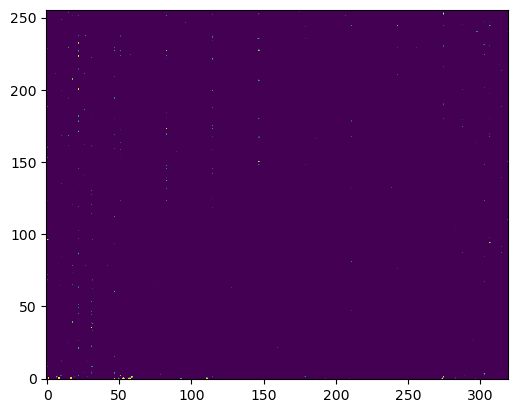

In [143]:
plt.imshow(collapsed_array,norm='linear',vmin=400,vmax=800,origin="lower")
plt.show()

In [147]:
hdu = fits.PrimaryHDU(frame_superk_dsubt_tiled)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_superK.fits')

In [111]:
frame_superk_dsubt = frame_superk_raw - dark_3

In [190]:
# the original superK image is smaller than I thought, so make a 
# semi-fake frame by tiling

frame_superk_dsubt_tiled = np.concatenate((frame_superk_dsubt,np.flip(np.flipud(frame_superk_dsubt))),axis=1)

In [191]:
np.shape(frame_superk_dsubt_tiled)

(160, 320)

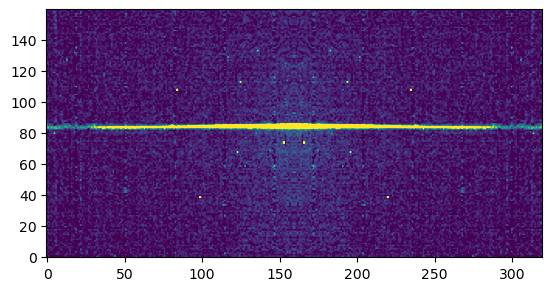

In [182]:
plt.imshow(frame_superk_dsubt_tiled,norm='linear',vmin=0,vmax=150,origin="lower")
plt.savefig('super_k.png')

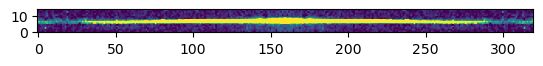

In [216]:
plt.imshow(frame_superk_dsubt_tiled[77:92,:],norm='linear',vmin=0,vmax=150,origin="lower")
#plt.savefig('super_k.png')
plt.show()

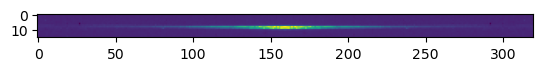

In [185]:
plt.imshow(frame_superk_dsubt_tiled[75:90,:])
plt.show()

In [217]:
# try cropping

frame_superk_dsubt_tiled = frame_superk_dsubt_tiled[77:92,:]

In [150]:
# consider this to start at 1000 A, and it goes to 2000 A in steps of 1

#command_space = np.zeros(1000)

(160, 320)

In [241]:
# take cutout of basis set to line up with broadband

wavel_array = np.zeros((len(dict_1)))
x_array = np.zeros((len(dict_1)))
y_array = np.zeros((len(dict_1)))

cube_w_commands = np.zeros((len(dict_1),len(dict_1)))

N_pixels = np.shape(frame_superk_dsubt_tiled)[0]*np.shape(frame_superk_dsubt_tiled)[1]
M_basis_set_cmds = len(command_array)

# ORIGINAL COMMAND
cube_basis_registered = np.zeros((len(dict_1),
                                  np.shape(frame_superk_dsubt_tiled)[0],
                                  np.shape(frame_superk_dsubt_tiled)[1])) # initialize


# COMMAND TO ACCOMODATE CROPPING
#cube_basis_registered = np.zeros((len(dict_1),15,320)) # initialize


poke_matrix = np.zeros((N_pixels,M_basis_set_cmds))

idx = 0

for key in dict_1:
    
    wavel_array[idx] = float(key)
    
    vec_command = np.zeros(len(dict_1))
    vec_command[idx] = 1.
    
    response_this = response_cube_registered[idx]
    #response_this = dict_1[key]
    #cube_basis_registered[idx] = response_this
    
    #cube_basis_registered[idx] = response_cube_registered
    
    # accumulate x,y values
    x2, y2 = centroid_quadratic(response_this)
    x_array[idx] = x2
    y_array[idx] = y2
    
    ## accumulate poke matrix
    
    # accumulate flattened responses
    flattened = response_this.flatten()
    poke_matrix[:,idx] = flattened
    
    # add commands to cube
    cube_w_commands[idx,:] = vec_command
    
    idx += 1

In [261]:
# Each array with have 20 random points this time
# see https://stackoverflow.com/questions/34746724/fit-data-to-curve-using-polyfit-with-multiple-variables-in-python-using-numpy-po

'''
|z1|   |1  x1  x1^2  y1  y1^2|   |a|
|z2|   |1  x2  x2^2  y2  y2^2|   |b|
|z3| = |1  x3  x3^2  y3  y3^2| x |c|
|z4|   |1  x4  x4^2  y4  y4^2|   |d|
|z5|   |1  x5  x5^2  y5  y5^2|   |e|
'''

x = x_array[:-1] # remove nan
y = y_array[:-1] # remove nan
z = wavel_array[:-1] # remove nan

# We're solving Ax = B
A = np.column_stack([np.ones(len(x)), x, x**2, y, y**2])
B = z

# Solve the system of equations.
result, _, _, _ = np.linalg.lstsq(A, B)
a, b, c, d, e = result

/var/folders/8y/ztvmc5ys1pn64bjywt1qp4k40000gs/T/ipykernel_6102/759469183.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result, _, _, _ = np.linalg.lstsq(A, B)


In [260]:
print(b)

-1.3514601299533493


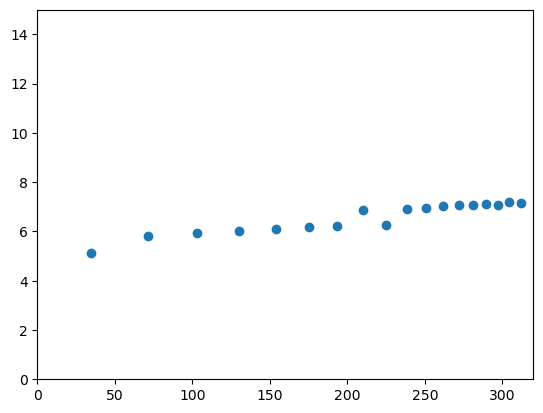

In [245]:
plt.scatter(x_array,y_array)

plt.xlim([0,320])
plt.ylim([0,15])
plt.show()

In [248]:
popt, pcov = curve_fit(func, xdata=x_array, ydata=wavel_array, p0=np.array([0.01,30,3.]))

NameError: name 'curve_fit' is not defined

In [247]:
[[x_array],[y_array],[wavel_array]]

[[array([312.10031571, 304.17215922, 297.03674694, 289.24210615,
         280.94131301, 271.89636288, 261.39834102, 250.81994842,
         238.68562271, 225.09481407, 210.11356809, 193.33432219,
         174.93084604, 153.96432416, 129.96369222, 102.76232217,
          71.05296841,  34.59943725,          nan])],
 [array([7.1630234 , 7.18855542, 7.07487727, 7.1319727 , 7.06042516,
         7.07484271, 7.01457847, 6.96563203, 6.89773987, 6.27649481,
         6.85791604, 6.20949421, 6.16276156, 6.09390815, 6.00799768,
         5.91800761, 5.79594214, 5.12605058,        nan])],
 [array([1720., 1680., 1640., 1600., 1560., 1520., 1480., 1440., 1400.,
         1360., 1320., 1280., 1240., 1200., 1160., 1120., 1080., 1040.,
         1010.])]]

In [236]:
from photutils.centroids import (centroid_1dg, centroid_2dg,
                                 centroid_com, centroid_quadratic)

In [237]:


data = response_cube_registered[2]
x2, y2 = centroid_quadratic(data)

In [238]:
x2

297.03674694048453

In [239]:
y2

7.0748772704397584

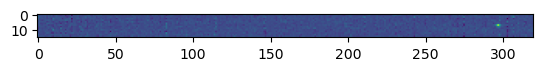

In [234]:
plt.imshow(response_cube_registered[2])
plt.show()

In [244]:
np.shape(response_cube_registered[2])

(15, 320)

In [219]:
response_matrix = np.linalg.pinv(poke_matrix)

In [220]:
# pickle everything: basis set, wavelength array, command matrix, response_matrix, broadband spectrum

# pickle
file_name_write = 'junk_apapana_test_cropped.pkl'
data_list = [response_cube_registered, wavel_array, cube_w_commands, frame_superk_dsubt_tiled, response_matrix]
open_file = open(file_name_write, "wb")
pickle.dump(data_list, open_file)
open_file.close()
print('Wrote',file_name_write)

Wrote junk_apapana_test_cropped.pkl


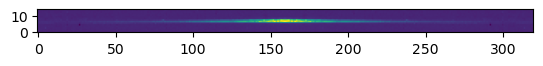

In [222]:
plt.imshow(frame_superk_dsubt_tiled, origin='lower')
plt.show()

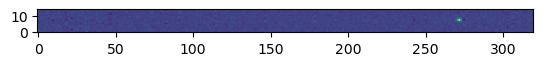

In [223]:
plt.imshow(response_cube_registered[5,:,:], origin='lower')
plt.show()

In [ ]:
make poke matrix

# each column is one 'poke', and the elements are the response function
poke_matrix[:,t] = flattened
#poke_matrix[i,:] = flattened

'''
plt.imshow(array_2d_w_spec)
plt.show()
'''



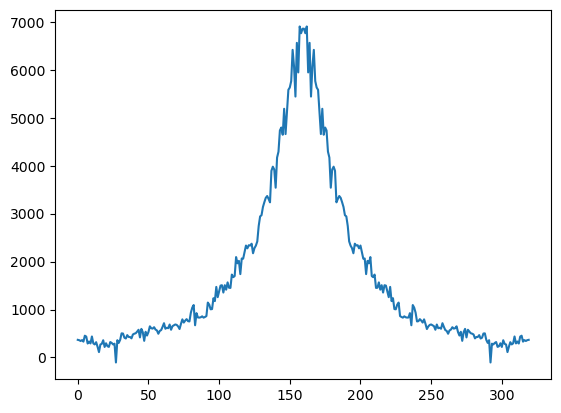

In [231]:
plt.plot(np.sum(frame_superk_dsubt_tiled,axis=0))
plt.savefig('integration_source.png')

In [225]:
hdu = fits.PrimaryHDU(response_cube_registered)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_response_cube_registered.fits', overwrite=True)

#np.shape(frame_superk_dsubt_tiled)

In [78]:
# check how stable the dark is

'''
test = np.zeros(len(dict_1))
idx = 0

for key in dict_1:
    print('---')
    print(key)
    
    test[idx] = np.median(dict_1[key])
    idx += 1
'''

"\ntest = np.zeros(len(dict_1))\nidx = 0\n\nfor key in dict_1:\n    print('---')\n    print(key)\n    \n    test[idx] = np.median(dict_1[key])\n    idx += 1\n"